C:\Users\vyomv\AppData\Local\Temp\ipykernel_16256\1671524659.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  traffic_data.fillna(method='ffill', inplace=True)


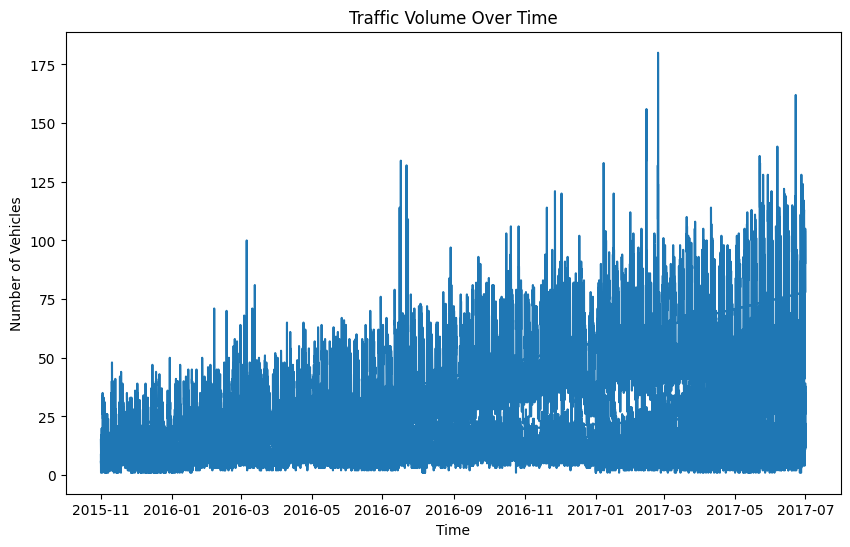

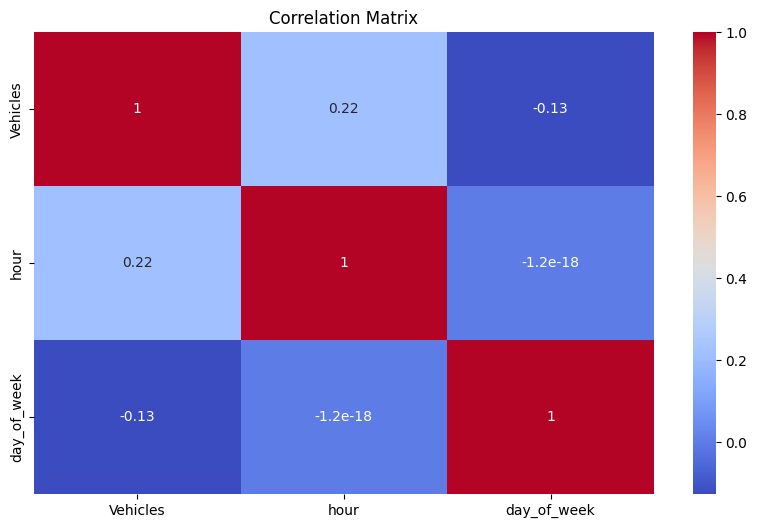

Mean Squared Error: 388.77266246441826
R-squared: 0.06070139816575493


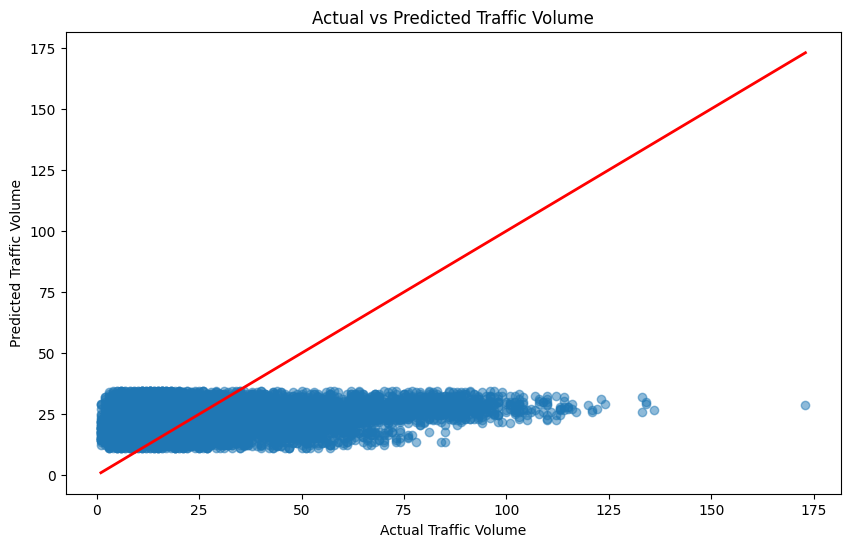

Predicted Traffic Volume: 25.86333851180171
Adjusting traffic light timings to REDUCE congestion.


C:\Users\vyomv\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
traffic_data = pd.read_csv('traffic.csv')
traffic_data.fillna(method='ffill', inplace=True)
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['hour'] = traffic_data['DateTime'].dt.hour
traffic_data['day_of_week'] = traffic_data['DateTime'].dt.dayofweek   
scaler = StandardScaler()
traffic_data[['hour', 'day_of_week']] = scaler.fit_transform(traffic_data[['hour', 'day_of_week']])
plt.figure(figsize=(10, 6))
plt.plot(traffic_data['DateTime'], traffic_data['Vehicles'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(traffic_data[['Vehicles', 'hour', 'day_of_week']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')``
plt.show()
X = traffic_data[['hour', 'day_of_week']]  
y = traffic_data['Vehicles']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.show()
real_time_data = pd.DataFrame({
    'hour': [14], 
    'day_of_week': [2]  
})
real_time_data_scaled = scaler.transform(real_time_data)
real_time_prediction = lin_reg.predict(real_time_data_scaled)
print(f"Predicted Traffic Volume: {real_time_prediction[0]}")
TRAFFIC_THRESHOLD = 0.8 
if real_time_prediction[0] > TRAFFIC_THRESHOLD:
    print("Adjusting traffic light timings to REDUCE congestion.")
else:
    print("Traffic flow is normal. No adjustment needed.")
